<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
# Import yfinance
import yfinance as yf

# Get the data for the stock AAPL
start = '2014-09-17'

In [ ]:
# Apple prediction

In [ ]:
# Bringing data from yfinance to dataframe - Apple
df = yf.download('AAPL',start)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Bringing data into csv file
df.to_csv('apple_data.csv', encoding='utf-8', index=False)

In [ ]:
# Checking data in dataframe
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00-04:00,25.317499,25.450001,25.147499,25.395000,22.760481,243706000
2014-09-18 00:00:00-04:00,25.482500,25.587500,25.389999,25.447500,22.807537,149197600
2014-09-19 00:00:00-04:00,25.572500,25.587500,25.125000,25.240000,22.621563,283609600
2014-09-22 00:00:00-04:00,25.450001,25.535000,25.145000,25.264999,22.643967,211153600
2014-09-23 00:00:00-04:00,25.150000,25.735001,25.135000,25.660000,22.997990,253608800


In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

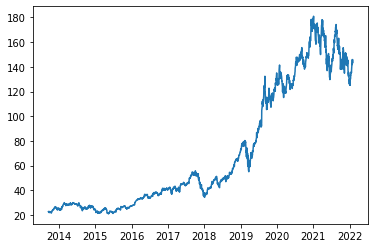

In [ ]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
# length of dataframe
len(df)

2109

In [ ]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [ ]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[22.760480880737305,
 22.807537078857422,
 22.621562957763672,
 22.643966674804688,
 22.997989654541016,
 22.79857635498047,
 21.929195404052734,
 22.57450294494629,
 22.431106567382812,
 22.57450294494629,
 22.222726821899414,
 22.38405418395996,
 22.321313858032227,
 22.321313858032227,
 22.12638282775879,
 22.585708618164062,
 22.635005950927734,
 22.57002830505371,
 22.3638858795166,
 22.12638282775879,
 21.855257034301758,
 21.568462371826172,
 21.88438606262207,
 22.352684020996094,
 22.959897994995117,
 23.0764102935791,
 23.488685607910156,
 23.576078414916992,
 23.551427841186523,
 23.916658401489258,
 24.05109405517578,
 23.970426559448242,
 24.198976516723633,
 24.512666702270508,
 24.333415985107422,
 24.39166831970215,
 24.461429595947266,
 24.53118896484375,
 24.490686416625977,
 24.68647003173828,
 25.035274505615234,
 25.388578414916992,
 25.694629669189453,
 25.651872634887695,
 25.984926223754883,
 25.804899215698242,
 26.173952102661133,
 26.2099609375,
 26.696039199

In [ ]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[123.19821166992188,
 123.97142028808594,
 122.46465301513672,
 124.79420471191406,
 124.80411529541016,
 125.63680267333984,
 126.02339935302734,
 125.01228332519531,
 126.24148559570312,
 129.34423828125,
 128.51153564453125,
 129.01712036132812,
 130.64283752441406,
 129.32443237304688,
 131.14840698242188,
 132.81378173828125,
 132.5362091064453,
 132.24874877929688,
 131.95135498046875,
 133.6068115234375,
 135.14332580566406,
 135.76785278320312,
 136.0751495361328,
 138.74176025390625,
 140.78378295898438,
 143.3115997314453,
 141.99317932128906,
 143.84690856933594,
 143.24220275878906,
 144.37228393554688,
 147.8517303466797,
 147.18756103515625,
 145.11573791503906,
 141.21006774902344,
 144.87783813476562,
 144.13436889648438,
 145.5221710205078,
 147.266845703125,
 147.69313049316406,
 145.49246215820312,
 143.71803283691406,
 144.37228393554688,
 144.59036254882812,
 144.2533416748047,
 146.07733154296875,
 145.67088317871094,
 145.77993774414062,
 145.08497619628906,
 145

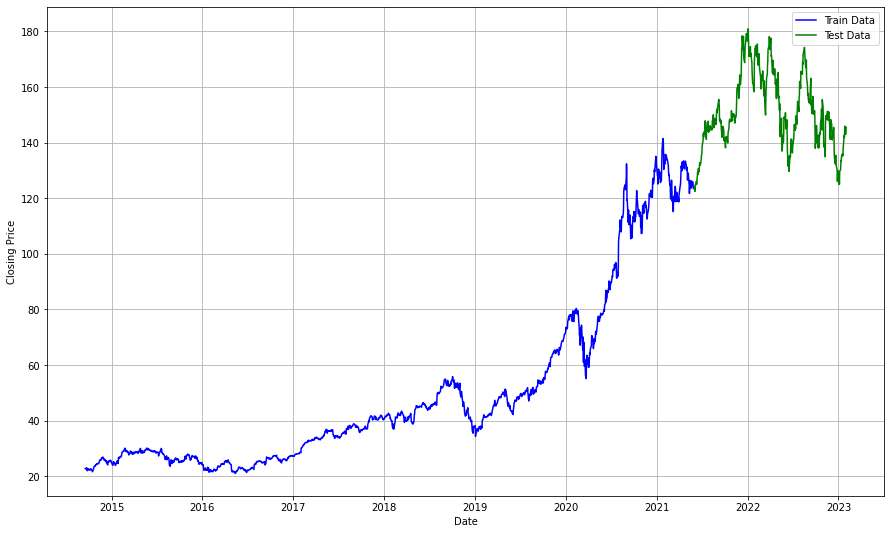

In [ ]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [ ]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [ ]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [ ]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2107
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -4145.176
Method:                       css-mle   S.D. of innovations              1.730
Date:                Thu, 02 Feb 2023   AIC                           8302.352
Time:                        02:23:57   BIC                           8336.270
Sample:                             1   HQIC                          8314.773
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0577      0.034      1.719      0.086      -0.008       0.123
ar.L1.D.y     -0.0593      0.022     -2.723      0.006      -0.102      -0.017
ar.L2.D.y     -0.0314      0.022     -1.440      0.1

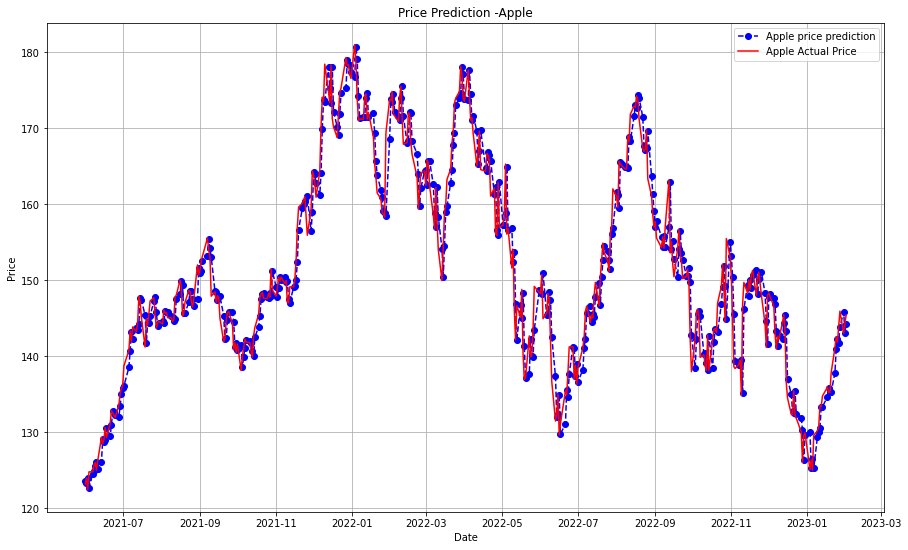

In [ ]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Apple price prediction')
plt.plot(start_date, test, color ='red', label ='Apple Actual Price')
plt.title('Price Prediction -Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.0148118689978968


MAPE of 1.5% implies the model is 98.5% accurate in predicting the test obeservations

In [ ]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 151.2905959179051
Mean Squared Error: 2.9670547575329262


In [ ]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 145.46197186382713
Prediction 124.61945504243812
Prediction 124.74615506806306
Prediction 122.98689484520041
Prediction 124.95725032977985
